In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# dataset stats
# [0] age – a positive integer (years)
# [1] FEV1 – a continuous valued measurement (liter)
# [2] height – a continuous valued measurement (inches)
# [3] gender – binary (female: 0, male: 1)
# [4] smoking status – binary (non-smoker: 0, smoker: 1)
# [5] weight – a continuous valued measurement (kg)

# Exercise 1

## a)

In [3]:
# Read the data from the file smoking.txt, and divide the dataset into 
# two groups consisting of smokers and non-smokers. 

with open("smoking.txt", encoding = 'utf-8') as f:
    reader = csv.reader(f, delimiter="\t")
    data = list(reader)
data = np.array(data)
data = data.astype(float)

In [4]:
smoks = data[np.isin(data[:, 4], 1)] 
non_smoks = data[np.isin(data[:, 4], 0)]

In [5]:
# Write a script which computes the average lung function, 
# measured in FEV1, among the smokers and among the non-smokers

avg_smoks = np.mean(smoks, axis=0)[1]
avg_non_smoks = np.mean(non_smoks, axis=0)[1]

print('average lung function for smokers: {}'.format(avg_smoks))
print('average lung function for non smokers: {}'.format(avg_non_smoks))

average lung function for smokers: 3.2768615384615387
average lung function for non smokers: 2.5661426146010164


In [6]:
# Report your computed average FEV1 scores. Are you surprised?
# Yes, I am definitely surprised because it is expected that smokers have a smaller lung volumne in litres.

# Exercise 2

<ipython-input-7-22ac158d9132>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['smokers', 'non smokers']);


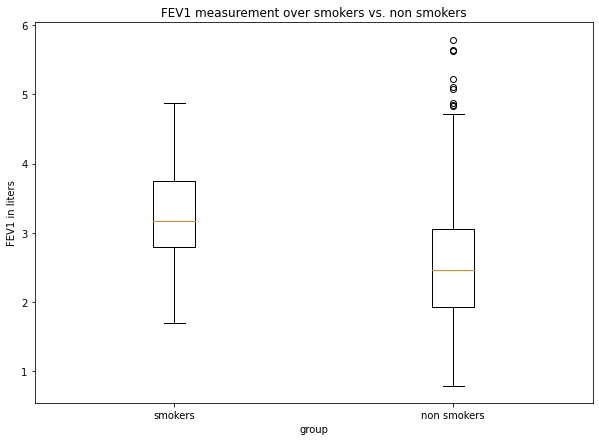

In [7]:
# Make a box plot of the FEV1 in the two groups. What do you see? Are you surprised?

fig, ax = plt.subplots(figsize =(10, 7))
ax.set_title('FEV1 measurement over smokers vs. non smokers')
data = [smoks[:, 1], non_smoks[:, 1]]
ax.set_xticklabels(['smokers', 'non smokers']);
ax.set_xlabel('group');
ax.set_ylabel('FEV1 in liters');
ax.boxplot(data);

In [8]:
# As expected form the average value in Exercise 1, the box plot supports the findings of 
# smokers having a higher lung volumne. The variance, however, seems to be higher for non smokers, 
# as well as the number of outliers.

# Exercise 3

## a)

In [9]:
# Write a script that performs a two-sided t-test whose null hypothesis is that the two
# populations have the same mean. Use a significance level of α = 0.05, and return a
# binary response indicating acceptance or rejection of the null hypothesis. You should
# try do implement it by yourself – though not the CDF of the t-distribution, use scipy.
# If you can’t, you may use scipy’s stats.ttest ind.

In [10]:
from scipy import stats

def t_test_same_mean(data1, data2, alpha):
    
    result = True
    n1 = len(data1)
    n2 = len(data2)
    df = n1 + n2 - 2
    
    std_dev1 = np.std(data1)
    std_dev2 = np.std(data2)
    
    gr_std_diff = ((n1-1) * (std_dev1**2)) + ((n2-1) * (std_dev2**2))
    gr_std_diff = np.sqrt((gr_std_diff / df))
        
    t = (np.mean(data1) - np.mean(data2)) / (gr_std_diff * np.sqrt((1/n1) + (1/n2)))
    
    if t >= stats.t.ppf(q=1-.05/2, df=df):
        result = False
    
    return 't: {},\ndf: {},\np-val: {},\naccept?: {}'.format(t, df, alpha, result)

alpha = 0.05
print(t_test_same_mean(smoks[:, 1], non_smoks[:, 1], alpha))

t: 6.473411327744889,
df: 652,
p-val: 0.05,
accept?: False


# Exercise 4

## a)

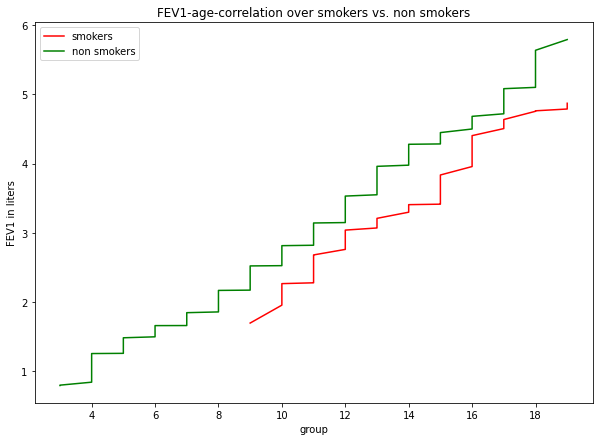

In [11]:
# Compute the correlation between age and FEV1. Make a 2D plot of age versus FEV1
# where non smokers appear in one color and smokers appear in another.

fig, ax = plt.subplots(figsize =(10, 7))
ax.set_title('FEV1-age-correlation over smokers vs. non smokers')
plt.plot(sorted(smoks[:, 0]), sorted(smoks[:, 1]), color='r', label='smokers');
plt.plot(sorted(non_smoks[:, 0]), sorted(non_smoks[:, 1]), color='g', label='non smokers');
plt.legend();
ax.set_xlabel('group');
ax.set_ylabel('FEV1 in liters');

# Exercise 5

## a)

589 65


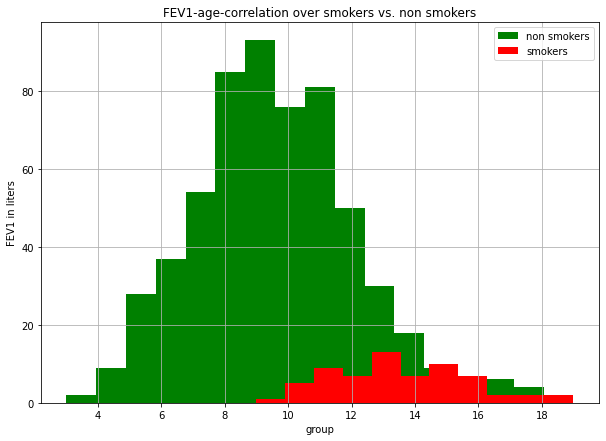

In [12]:
# Create a histogram over the age of subjects in each of the two groups, smokers and non-smokers.

print(len(non_smoks[:, 0]), len(smoks[:, 0]))

fig, ax = plt.subplots(figsize =(10, 7))
ax.set_title('FEV1-age-correlation over smokers vs. non smokers')
plt.hist(non_smoks[:, 0], bins=len(set(non_smoks[:, 0])), color='g', label='non smokers');
plt.hist(smoks[:, 0], bins=len(set(smoks[:, 0])), color='r', label='smokers');
plt.legend();
plt.grid();
ax.set_xlabel('group');
ax.set_ylabel('FEV1 in liters');

In [13]:
# Overall, three things become even more clear than in the previous analysis.
"""
1. The number of non smokers exceeds the number of smokers drastically.
2. The distribution over the age groups is very different from smokers to non smoker is two ways:
    a) The plot supports the findings from the earlier exercise that the mean age is higher in the group of smokers.
    That is, the red plotted bars for the smokers are more towards the right side of the plot
    b) The distribution of the both groups over the parameter of age is different: where there are rather high spikes
        for the ages 9, 8 und 11 in the non smokers plot, we see a more flat curve throughout the smokers age groups.
        However, this could also be due to the general less datapoints in that group with some classes (age 9) only
        having 1 record.
3. Intersting side note: even though we have way more examples of non smokers (589 vs. 65), there still seem to be 
    more smokers at the ages of 15 and 16 than there are non-smokers.
"""

'\n1. The number of non smokers exceeds the number of smokers drastically.\n2. The distribution over the age groups is very different from smokers to non smoker is two ways:\n    a) The plot supports the findings from the earlier exercise that the mean age is higher in the group of smokers.\n    That is, the red plotted bars for the smokers are more towards the right side of the plot\n    b) The distribution of the both groups over the parameter of age is different: where there are rather high spikes\n        for the ages 9, 8 und 11 in the non smokers plot, we see a more flat curve throughout the smokers age groups.\n        However, this could also be due to the general less datapoints in that group with some classes (age 9) only\n        having 1 record.\n3. Intersting side note: even though we have way more examples of non smokers (589 vs. 65), there still seem to be \n    more smokers at the ages of 15 and 16 than there are non-smokers.\n'